In [41]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from functions import Util

path_data = './data'
path_img = path_data + '/imgs'
path_csv = path_data + '/csv'
level = 'andamento-nazionale'
file_name_n = path_csv + '/covid19-' + level + '.csv'

In [2]:
df_n = pd.read_csv(file_name_n)
df_n

,data,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,nuovi_tamponi,np_su_nt
0,2020-09-15T17:00:00,2222,201,2423,37289,39712,525,1229,214645,35633,237475.0,52515.0,289990,9943944,6006675.0,80517.0,1.526386
1,2020-09-16T17:00:00,2285,207,2492,38040,40532,820,1452,215265,35645,238097.0,53345.0,291442,10044551,6064792.0,100607.0,1.443240
2,2020-09-17T17:00:00,2348,212,2560,38853,41413,881,1585,215954,35658,238845.0,54180.0,293025,10146324,6127243.0,101773.0,1.557388
3,2020-09-18T17:00:00,2387,208,2595,39862,42457,1044,1907,216807,35668,239692.0,55240.0,294932,10246163,6187258.0,99839.0,1.910075
4,2020-09-19T17:00:00,2380,215,2595,40566,43161,704,1638,217716,35692,240377.0,56192.0,296569,10349386,6248028.0,103223.0,1.586856
5,2020-09-20T17:00:00,2365,222,2587,41511,44098,937,1587,218351,35707,241017.0,57139.0,298156,10432814,6302761.0,83428.0,1.902239
6,2020-09-21T17:00:00,2475,232,2707,42372,45079,981,1350,218703,35724,241638.0,57868.0,299506,10488676,6342654.0,55862.0,2.416670
7,2020-09-22T17:00:00,2604,239,2843,42646,45489,410,1392,219670,35738,242173.0,58724.0,300897,10575979,6391999.0,87303.0,1.594447
8,2020-09-23T17:00:00,2658,244,2902,43212,46114,625,1640,220665,35758,242958.0,59579.0,302537,10679675,6455762.0,103696.0,1.581546
9,2020-09-24T17:00:00,2731,246,2977,43803,46780,666,1786,221762,35781,243680.0,60643.0,304323,10787694,6520661.0,108019.0,1.653413


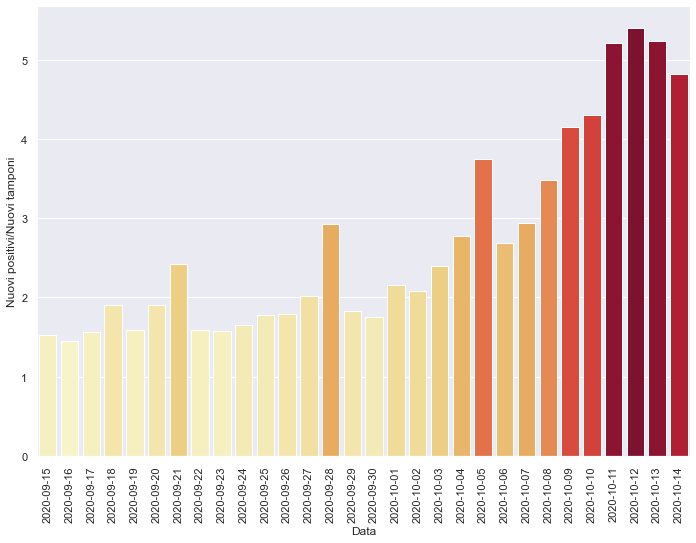

In [38]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

color_1 = 'YlOrRd'
# color_1 = 'RdYlGn_r'  # reversed palette
palette = Util.colors_from_values(df_n.np_su_nt, color_1)
g = sns.barplot(x='data', y='np_su_nt', palette=palette, data=df_n);
# g = sns.barplot(x='data', y='np_su_nt', color='red', data=df_n);
g.set(xlabel='Data', ylabel='Nuovi positivi/Nuovi tamponi')
x_labels = df_n.data.apply(lambda x: x.split('T')[0])
g.set_xticklabels(labels=x_labels, rotation=90);
g.get_figure().savefig(path_img + '/nuovi_positivi_su_nuovi_tamponi_n.png', bbox_inches = 'tight')

In [42]:
last_date = datetime.datetime.fromisoformat(df_n.tail(1).data.array[0])
days = 7
date_threshold = Util.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df_n_7 = df_n[df_n.data > date_threshold_str].reset_index(drop=True)
df_n_7

,data,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,nuovi_tamponi,np_su_nt
0,2020-10-07T17:00:00,3782,337,4119,58457,62576,2442,3678,235303,36061,258884.0,75056.0,333940,12069402,7296766.0,125314.0,2.935027
1,2020-10-08T17:00:00,3925,358,4283,61669,65952,3376,4458,236363,36083,261304.0,77094.0,338398,12197500,7365751.0,128098.0,3.480148
2,2020-10-09T17:00:00,4086,387,4473,65637,70110,4158,5372,237549,36111,264137.0,79633.0,343770,12326971,7443593.0,129471.0,4.149192
3,2020-10-10T17:00:00,4336,390,4726,70103,74829,4719,5724,238525,36140,267320.0,82174.0,349494,12460055,7523702.0,133084.0,4.301043
4,2020-10-11T17:00:00,4519,420,4939,74136,79075,4246,5456,239709,36166,270510.0,84440.0,354950,12564713,7592410.0,104658.0,5.213171
5,2020-10-12T17:00:00,4821,452,5273,77491,82764,3689,4619,240600,36205,272960.0,86609.0,359569,12650155,7652059.0,85442.0,5.406006
6,2020-10-13T17:00:00,5076,514,5590,81603,87193,4429,5901,242028,36246,276267.0,89200.0,365467,12762699,7722319.0,112544.0,5.243283
7,2020-10-14T17:00:00,5470,539,6009,86436,92445,5252,7332,244065,36289,280479.0,92320.0,372799,12914895,7809920.0,152196.0,4.817472


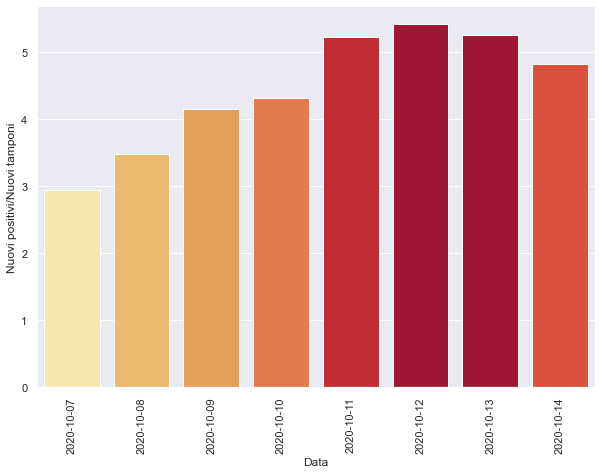

In [49]:
sns.set(rc={'figure.figsize':(10, 7)})

color_1 = 'YlOrRd'
# color_1 = 'RdYlGn_r'  # reversed palette
palette = Util.colors_from_values(df_n_7.np_su_nt, color_1)
g = sns.barplot(x='data', y='np_su_nt', palette=palette, data=df_n_7);
# g = sns.barplot(x='data', y='np_su_nt', color='red', data=df_n);
g.set(xlabel='Data', ylabel='Nuovi positivi/Nuovi tamponi')
x_labels = df_n_7.data.apply(lambda x: x.split('T')[0])
g.set_xticklabels(labels=x_labels, rotation=90);
g.get_figure().savefig(path_img + '/nuovi_positivi_su_nuovi_tamponi_n_7.png', bbox_inches = 'tight')